# Plotting Beta vs Average Nutriscore
This notebook loads the CSV data and plots the graph with proper labels and annotations.

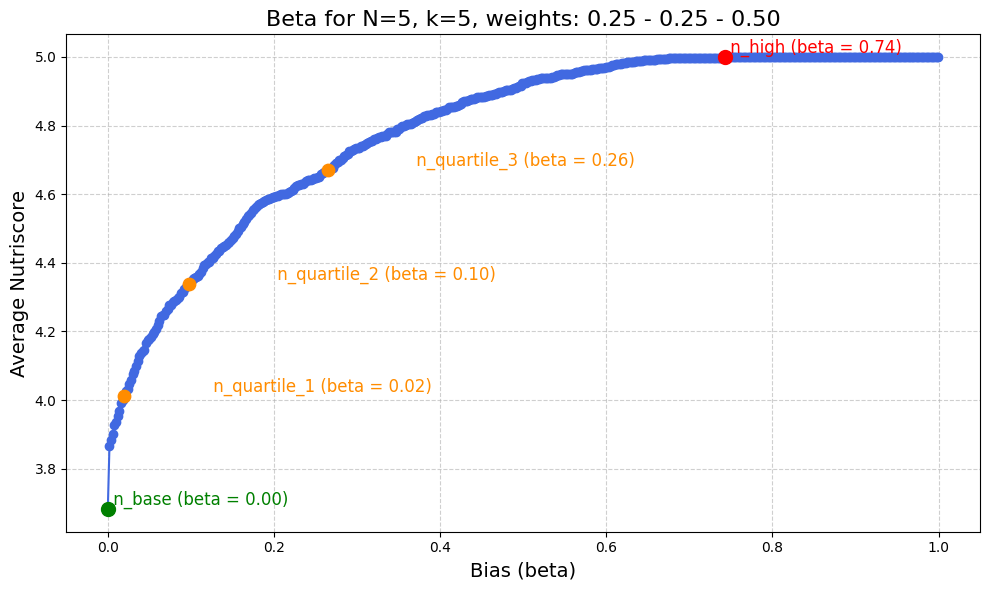

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = pd.read_csv('../data/fucam/out/betas_N5_k5_w25-25-50.csv')

# Extract columns
betas = data['beta']
n_avg = data['n_avg']

# Find min and max
n_base = n_avg.min()
n_high = n_avg.max()

# Create figure
plt.figure(figsize=(10, 6))

# Plot
plt.plot(betas, n_avg, marker='o', linestyle='-', color='royalblue')

# Labels and title
plt.xlabel('Bias (beta)', fontsize=14)
plt.ylabel('Average Nutriscore', fontsize=14)
plt.title('Beta for N=5, k=5, weights: 0.25 - 0.25 - 0.50', fontsize=16)

# Annotate n_base and n_high
plt.scatter(betas[n_avg.idxmin()], n_base, color='green', s=100, zorder=5)
plt.scatter(betas[n_avg.idxmax()], n_high, color='red', s=100, zorder=5)
plt.text(betas[n_avg.idxmin()], n_base, f' n_base (beta = {betas[n_avg.idxmin():].iloc[0]:.2f})', verticalalignment='bottom', fontsize=12, color='green')
plt.text(betas[n_avg.idxmax()], n_high, f' n_high (beta = {betas[n_avg.idxmax():].iloc[0]:.2f})', verticalalignment='bottom', fontsize=12, color='red')

# Define intermediate points (quartiles)
quartiles = np.linspace(n_base, n_high, 5)[1:-1]  # 3 points inside
quartile_labels = ['n_quartile_1', 'n_quartile_2', 'n_quartile_3']

# For each quartile, find closest point and display beta value
for q_value, label in zip(quartiles, quartile_labels):
    idx_closest = (np.abs(n_avg - q_value)).idxmin()
    plt.scatter(betas[idx_closest], n_avg[idx_closest], color='darkorange', s=80, zorder=5)  # Darker orange
    plt.text(betas[idx_closest] + 0.01, n_avg[idx_closest], f' {label} (beta = {betas[idx_closest]:.2f})', verticalalignment='bottom', fontsize=12, color='darkorange')

# Style
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the figure
plt.savefig('../data/fucam/out/beta_vs_nutriscore_plot.png', dpi=300)

# Show plot
plt.show()
